# Jonathan Halverson
# Friday, January 5, 2017
# Aside on FFT applied to temperature data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

The records consist of the mean temperature in Boston for each week over a 30-week period (n_steps). The target is the mean temperature the week after the window or the 31st week. Our training data are intervals taken over a 5 year period or 261 weeks.

In [2]:
bos_wthr = pd.read_csv('../project_boston_restaurants/data/boston_weather_2015_2011.csv', parse_dates=['EST'])
bos_wthr.head(3).transpose()

,0,1,2
EST,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00
Max TemperatureF,33,41,37
Mean TemperatureF,28,36,30
Min TemperatureF,22,31,22
Max Dew PointF,16,17,36
MeanDew PointF,8,15,20
Min DewpointF,5,11,8
Max Humidity,53,53,100
Mean Humidity,43,45,72
Min Humidity,32,37,43


Remove the last row to make an odd number of points:

In [3]:
bos_wthr = bos_wthr[:-1]
bos_wthr.shape

(1825, 23)

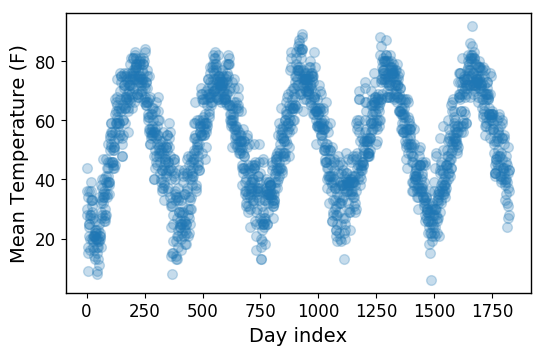

In [4]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)
plt.xlabel('Day index')
plt.ylabel('Mean Temperature (F)')

In [5]:
N = bos_wthr['Mean TemperatureF'].index.values.size
freq = np.fft.fftfreq(n=N, d=1.0)
Hn = np.fft.fft(bos_wthr['Mean TemperatureF'])

fftfreq stores the frequency bin centers associated with the DFT of the original signal. Note that the zero frequency is included (DC offset or sum of original signal values). Both positive and negative frequencies are stored.

In [6]:
help(np.fft.fftfreq)

Help on function fftfreq in module numpy.fft.helper:

fftfreq(n, d=1.0)
    Return the Discrete Fourier Transform sample frequencies.
    
    The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).  For instance, if
    the sample spacing is in seconds, then the frequency unit is cycles/second.
    
    Given a window length `n` and a sample spacing `d`::
    
      f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
      f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
    
    Parameters
    ----------
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.
    
    Returns
    -------
    f : ndarray
        Array of length `n` containing the sample frequencies.
    
    Examples
    --------
    >>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
    >>> fourier = np.fft.fft(signal)
    >

In [7]:
freq

array([ 0.        ,  0.00054795,  0.00109589, ..., -0.00164384,
       -0.00109589, -0.00054795])

In [8]:
Hn

array([  9.64070000e+04  +0.j        ,  -4.00031976e+02+583.0070788j ,
        -1.27279646e+02-459.36834533j, ...,  -7.02210665e+01-508.29843182j,
        -1.27279646e+02+459.36834533j,  -4.00031976e+02-583.0070788j ])

Note that the values at plus and minus the frequency have the same real part but the imaginary part is the opposite sing:

In [9]:
Hn[1], Hn[-1]

((-400.03197573616598+583.00707879909965j),
 (-400.03197573616558-583.00707879910158j))

Get indices for positive frequencies:

In [10]:
ind = np.arange(1, N/2 + 1)
np.array_equal(ind, np.argwhere(freq > 0).flatten())

True

In [11]:
freq[ind][:10]

array([ 0.00054795,  0.00109589,  0.00164384,  0.00219178,  0.00273973,
        0.00328767,  0.00383562,  0.00438356,  0.00493151,  0.00547945])

Note that the Nyquist frequency (which is half of the sampling rate of a discrete signal processing system) is given by 1/(2*N*d).

Negative frequencies are indexed by -ind:

In [12]:
freq[-ind][:10]

array([-0.00054795, -0.00109589, -0.00164384, -0.00219178, -0.00273973,
       -0.00328767, -0.00383562, -0.00438356, -0.00493151, -0.00547945])

In [13]:
# remove DC offset and frequencies beyond the Nyquist
s = slice(1, N/2+1)

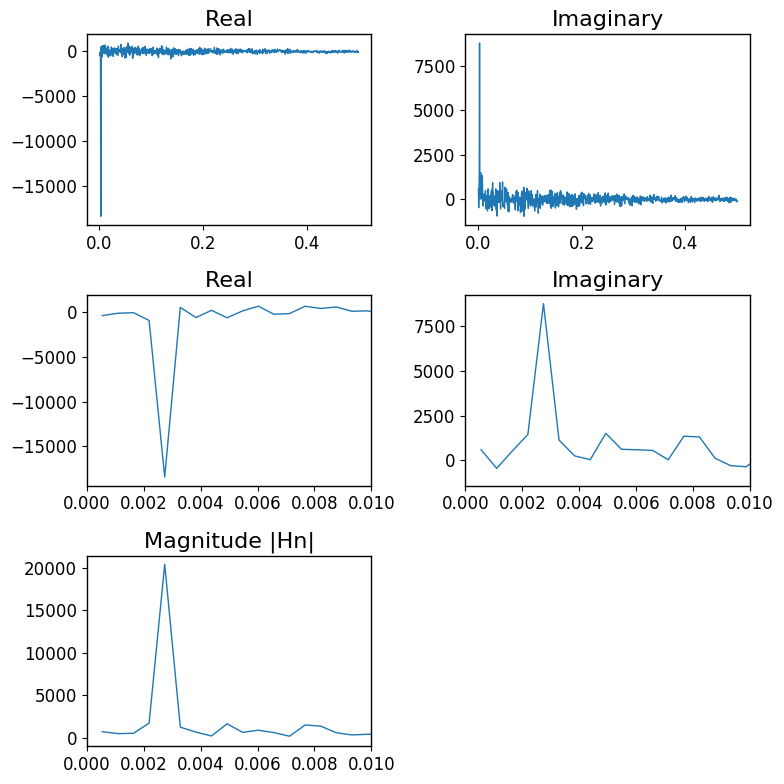

In [14]:
plt.subplots(figsize=(8, 8))
plt.subplot(321)
plt.plot(freq[s], Hn[s].real)
plt.title('Real')
plt.subplot(322)
plt.plot(freq[s], Hn[s].imag)
plt.title('Imaginary')
plt.subplot(323)
plt.plot(freq[s], Hn[s].real)
plt.xlim(0.0, 0.01)
plt.title('Real')
plt.subplot(324)
plt.plot(freq[s], Hn[s].imag)
plt.xlim(0.0, 0.01)
plt.title('Imaginary')
plt.subplot(325)
plt.plot(freq[s], np.absolute(Hn[s]))
plt.xlim(0.0, 0.01)
plt.title('Magnitude |Hn|')
plt.tight_layout()

Compute the power spectral density:

In [15]:
psd = np.abs(Hn[ind])**2 + np.abs(Hn[-ind])**2

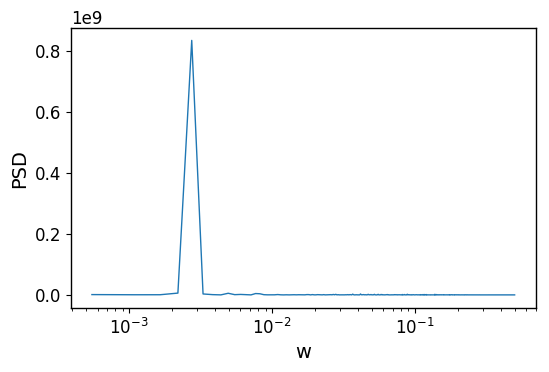

In [16]:
plt.semilogx(freq[ind], psd)
plt.xlabel('w')
plt.ylabel('PSD')

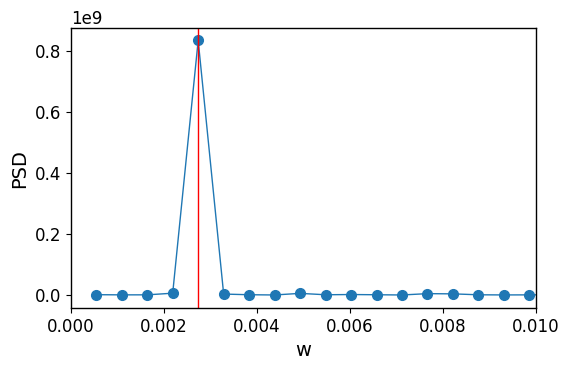

In [17]:
plt.plot(freq[ind], psd, marker='o')
plt.axvline(1 / 365.0, c='r')
plt.xlim(0.0, 0.01)
plt.xlabel('w')
plt.ylabel('PSD')

In [18]:
freq[ind][:10]

array([ 0.00054795,  0.00109589,  0.00164384,  0.00219178,  0.00273973,
        0.00328767,  0.00383562,  0.00438356,  0.00493151,  0.00547945])

In [19]:
1 / freq[ind][4]

365.0

The peak corresponds to 365 days which is indeed the period of the periodic signal.

### Continuous signal made discrete

Create a continuous function that mimics the data:

In [20]:
dt = 0.1
t = np.arange(0.0, 1824.0, step=dt)
syn = 45.0 * (np.sin(t / 65.0) + 1.0) + 10.0 * np.random.randn(t.size)

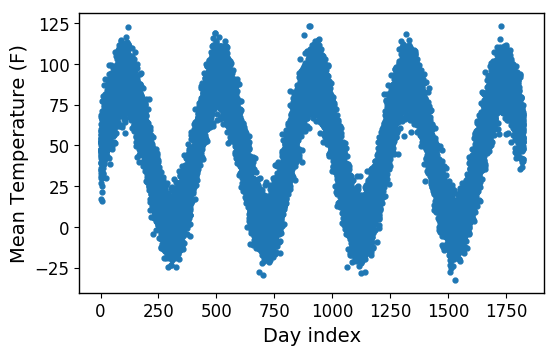

In [21]:
plt.scatter(t, syn, marker='.')
plt.xlabel('Day index')
plt.ylabel('Mean Temperature (F)')

In [22]:
freq = np.fft.fftfreq(n=t.size, d=dt)
Hn = np.fft.fft(syn)
Xn = Hn / t.size

In [23]:
ind = np.argwhere(freq > 0.0).flatten()

In [24]:
freq[ind][:10]

array([ 0.00054825,  0.00109649,  0.00164474,  0.00219298,  0.00274123,
        0.00328947,  0.00383772,  0.00438596,  0.00493421,  0.00548246])

In [25]:
freq[-ind][:10]

array([-0.00054825, -0.00109649, -0.00164474, -0.00219298, -0.00274123,
       -0.00328947, -0.00383772, -0.00438596, -0.00493421, -0.00548246])

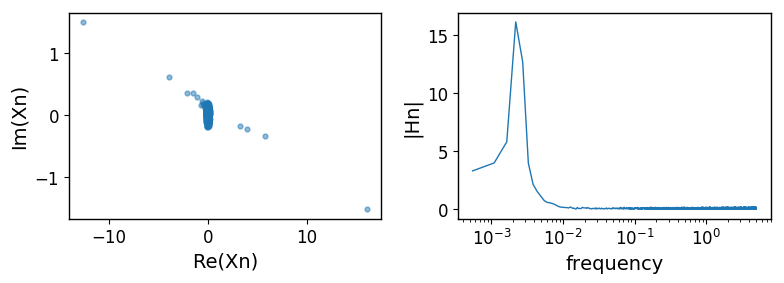

In [26]:
plt.subplots(figsize=(8, 3))
plt.subplot(121)
plt.scatter(Xn[ind].real, Xn[ind].imag, marker='.', alpha=0.5)
plt.xlabel('Re(Xn)')
plt.ylabel('Im(Xn)')
plt.subplot(122)
plt.semilogx(freq[ind], np.absolute(Xn[ind]))
plt.xlabel('frequency')
plt.ylabel('|Hn|')
plt.tight_layout()

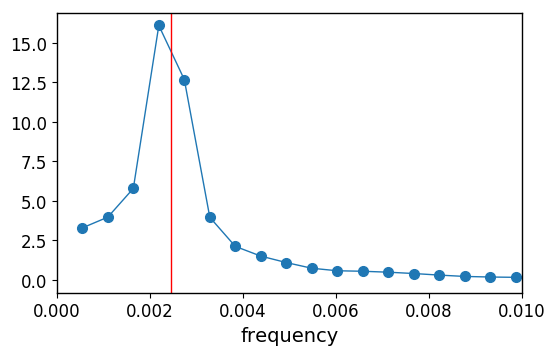

In [27]:
plt.plot(freq[ind], np.absolute(Xn[ind]), marker='o')
plt.axvline(1.0 / (2 * np.pi * 65.0), c='r')
plt.xlim(0.0, 0.01)
plt.xlabel('frequency')

In [28]:
freq[ind][:10]

array([ 0.00054825,  0.00109649,  0.00164474,  0.00219298,  0.00274123,
        0.00328947,  0.00383772,  0.00438596,  0.00493421,  0.00548246])

In [29]:
1/(2 * np.pi * 65.0)

0.0024485375860291594

We see that the frequency of the signal cannot be represented by a single frequency bin. However, if the number of points were changed it could be arranged to have a perfect fit:

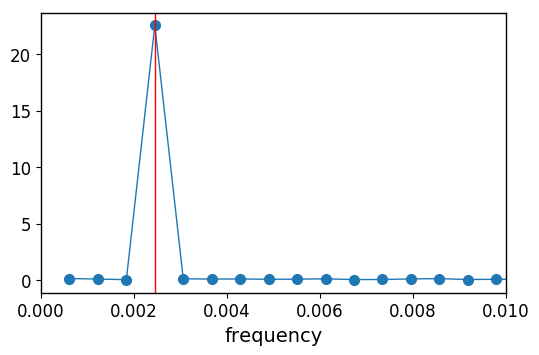

In [30]:
N = 16340
freq = np.fft.fftfreq(n=N, d=dt)
plt.plot(freq[freq > 0.0], np.absolute(np.fft.fft(syn[:N])[freq > 0.0]/N), marker='o')
plt.axvline(1.0 / (2 * np.pi * 65.0), c='r')
plt.xlim(0.0, 0.01)
plt.xlabel('frequency')

We note that the continuous Fourier transform of a sine function is a delta function in imaginary space.

### Conventional Wikipedia example

In [31]:
N = 500
pi2 = 2 * np.pi
t = np.linspace(0, 0.5, num=N)
F = np.cos(10 * pi2 * t) + 2 * np.cos(20 * pi2 * t) + 3 * np.cos(30 * pi2 * t) + 4 * np.cos(40 * pi2 * t) + 5 * np.cos(50 * pi2 * t)

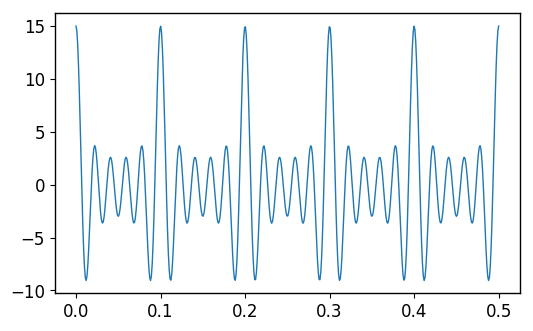

In [32]:
plt.plot(t, F)

In [33]:
Xn = np.fft.fft(F) / N
dt = t[1] - t[0]
freq = np.fft.fftfreq(n=N, d=dt)

In [34]:
msk = (freq > 0.0)

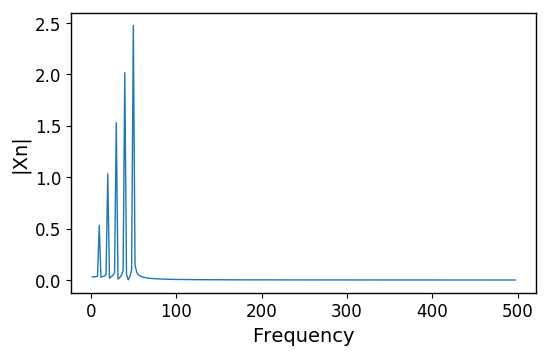

In [35]:
plt.plot(freq[msk], np.absolute(Xn[msk]))
plt.xlabel('Frequency')
plt.ylabel('|Xn|')

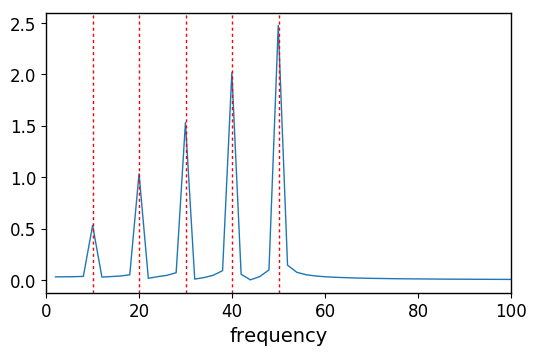

In [36]:
plt.plot(freq[msk], np.absolute(Xn[msk]))
plt.axvline(10, c='r', ls=':')
plt.axvline(20, c='r', ls=':')
plt.axvline(30, c='r', ls=':')
plt.axvline(40, c='r', ls=':')
plt.axvline(50, c='r', ls=':')
plt.xlim(0.0, 100)
plt.xlabel('frequency')

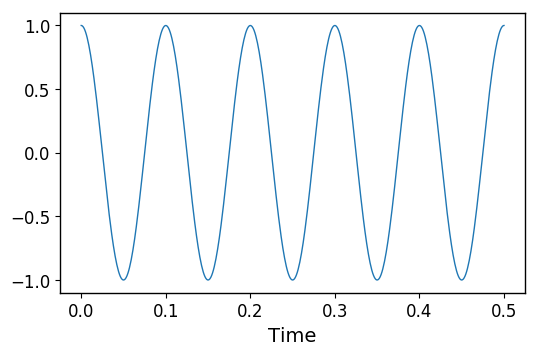

In [37]:
t = np.linspace(0, 0.5, 500)
plt.plot(t, np.cos(10 * pi2 * t))
plt.xlabel('Time')

The period of the wave above is 1/10 so the frequency is 10. This agree with the result above (i.e., a cosine wave with argument 20 pi has a frequency of 10 or 20 pi divided by 2 pi.

##### Explicit calculation of the DFT

In [38]:
N = bos_wthr['Mean TemperatureF'].index.size
Xk = []
for k in range(0, N):
     summ = 0.0 + 0.0j
     for n in range(0, N):
          summ += bos_wthr['Mean TemperatureF'][n] * np.exp(-1j * 2.0 * np.pi * k * n / float(N))
     Xk.append(summ)

In [39]:
Ak = np.fft.fft(bos_wthr['Mean TemperatureF'])
np.allclose(Xk, Ak)

True

In [40]:
np.allclose(np.fft.ifft(Ak), bos_wthr['Mean TemperatureF'])

True

We only consider half of the bidirectional bandwidth:

In [41]:
np.allclose(np.fft.rfft(bos_wthr['Mean TemperatureF']), Xk[:len(Xk)/2+1])

True

In [42]:
Ak[0]

(96407+0j)

In [43]:
bos_wthr['Mean TemperatureF'].sum()

96407